### Try this notebook in Google Colab, Binder or SageMaker!

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/InsightSoftwareConsortium/itkwidgets/blob/main/examples/integrations/dask/DaskArray.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/InsightSoftwareConsortium/itkwidgets/HEAD?labpath=examples%2Fintegrations%2Fdask%2FDaskArray.ipynb)
[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github.com/InsightSoftwareConsortium/itkwidgets/blob/main/examples/integrations/dask/DaskArray.ipynb)

In [1]:
# Install dependencies for this example
import sys

!{sys.executable} -m pip install -q 'dask[diagnostics]' toolz scikit-image pooch matplotlib "itkwidgets[all]>=1.0a23" "itk-io>=5.3.0"

In [2]:
import pooch
from pathlib import Path

import itk
import dask.array.image

from itkwidgets import view

ENVIRONMENT: Env.JUPYTERLAB


In [3]:
# Download data
png_files = pooch.retrieve(url='https://itk.mypinata.cloud/ipfs/bafybeihchncwrinp7rbgeqtfg5q5yrlqdneaswufpipoww6wbn26mmikrq/emdata_janelia_822252.zip',
                           known_hash='sha256:0896363b68255a31628d2c01696efd19c514b35d1ff12b09b763cedfc9e98759',
                           processor=pooch.Unzip())

This example is based on

http://matthewrocklin.com/blog/work/2017/01/17/dask-images


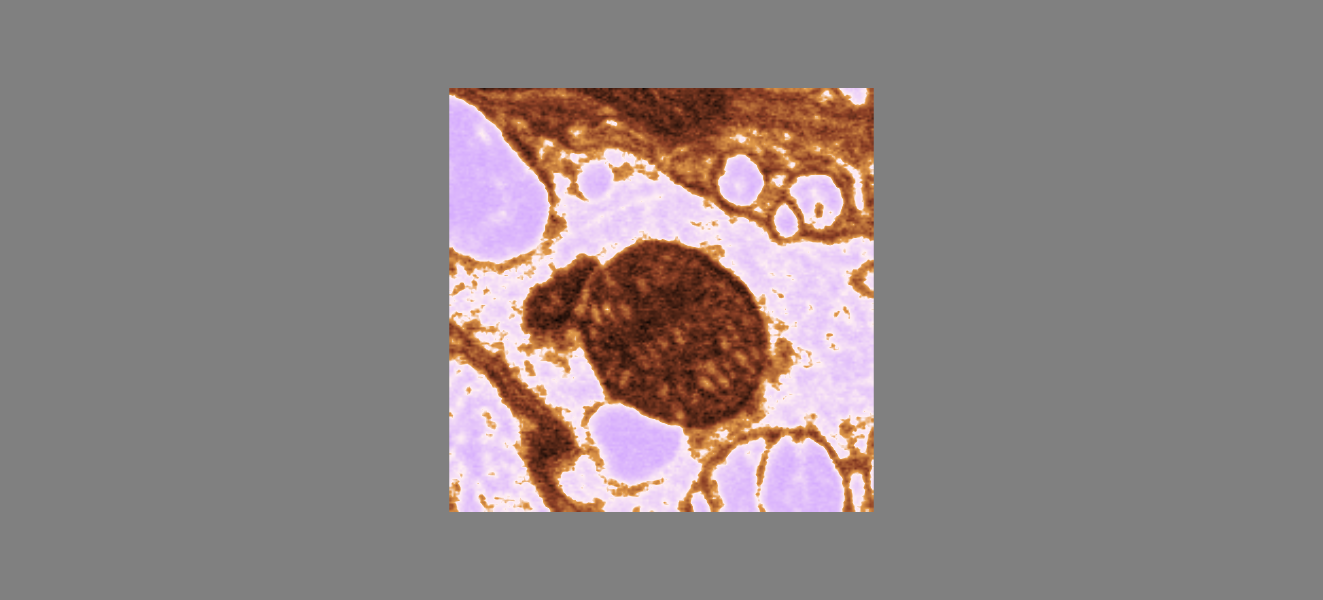
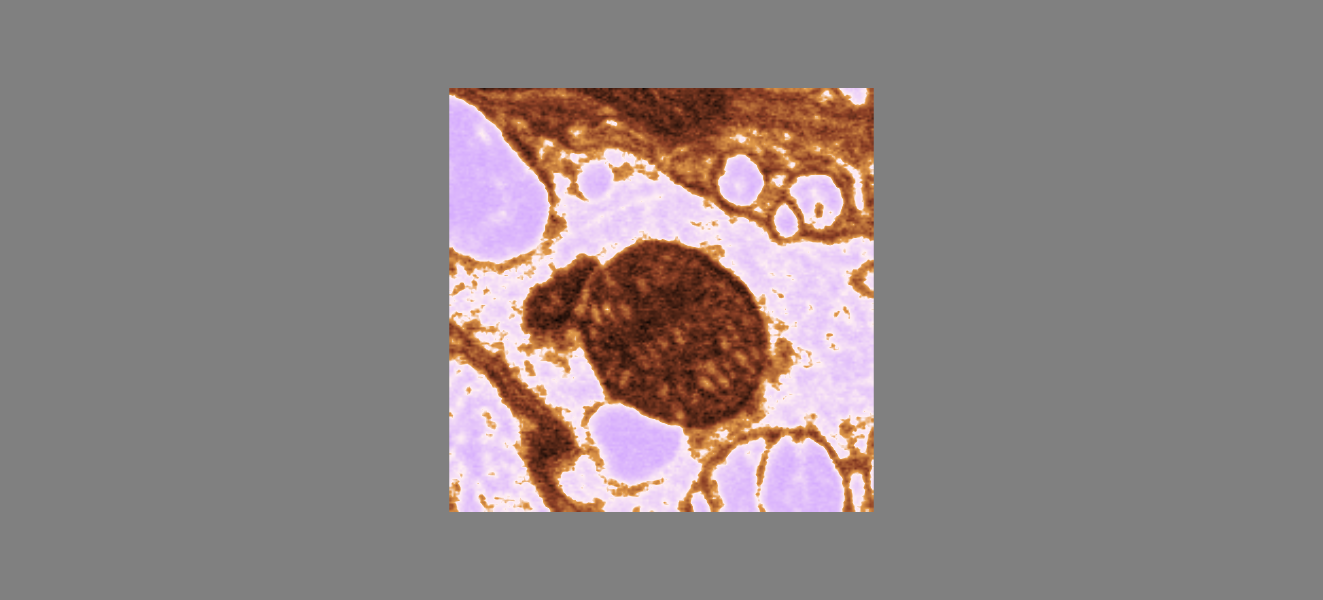

<IPython.core.display.Javascript object>

In [4]:
sample = itk.imread(png_files[0])
view(sample)

In [5]:
stack = dask.array.image.imread(str(Path(png_files[0]).parent / '*.png'))
stack

dask.array<imread, shape=(200, 200, 200), dtype=uint8, chunksize=(1, 200, 200), chunktype=numpy.ndarray>


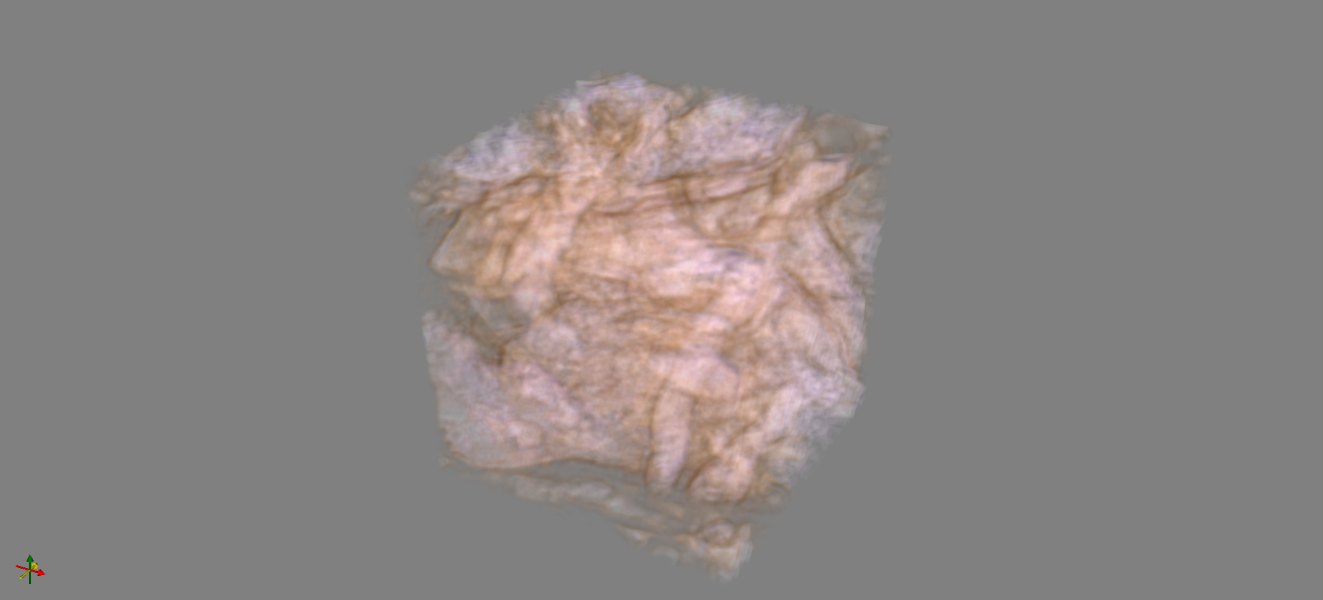
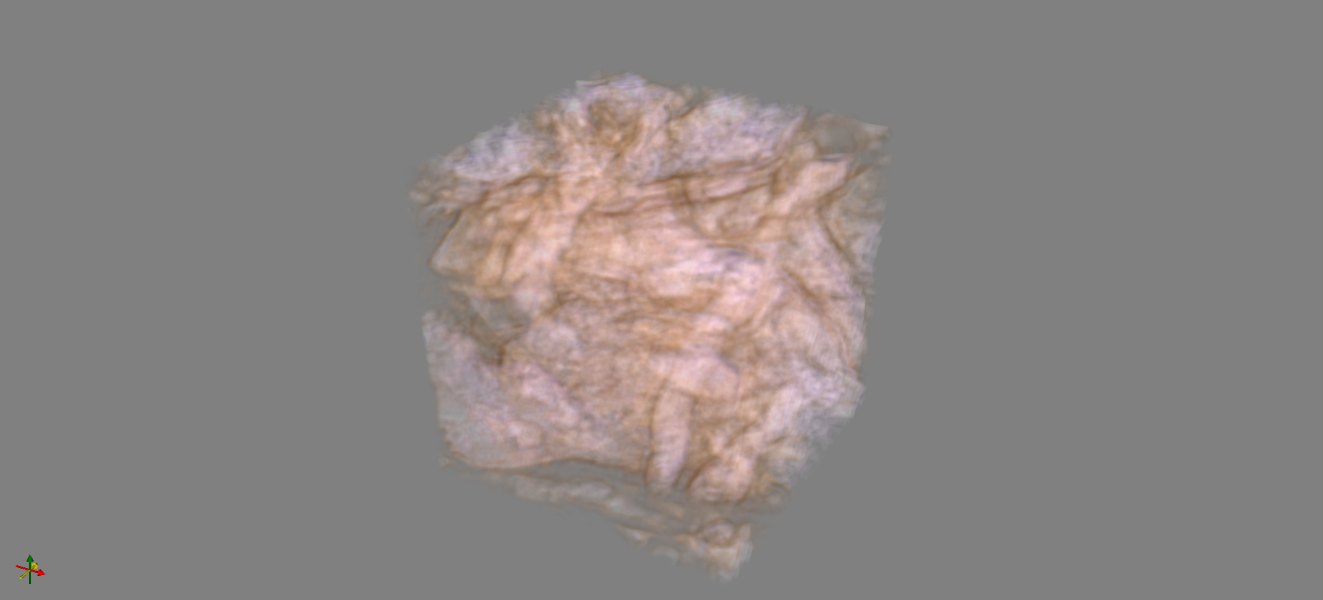

<IPython.core.display.Javascript object>

In [6]:
view(stack, shadow=False, gradient_opacity=0.4, ui_collapsed=True)